In [1]:
# %cd drive/My\ Drive/Travancore\ Analytics/work/TA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading data
df=pd.read_csv('data/train.csv')
print("Number of records : ",df.shape[0])
print("Number of features : ",df.shape[1]-1)
df.head()

Number of records :  42000
Number of features :  784


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


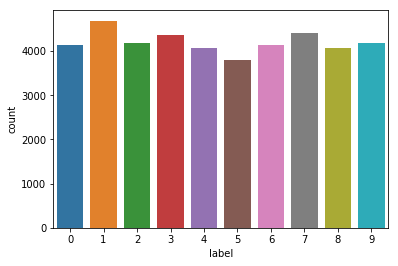

In [7]:
print(df['label'].value_counts())#target
sns.countplot(df['label'])

our target variable contains data of 10 different digits.

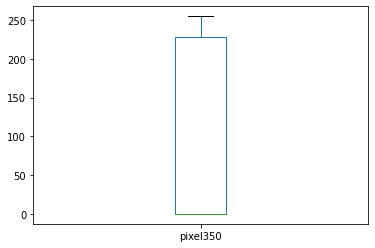

In [9]:
df['pixel350'].plot(kind='box')

the other features values ranges from 0 to 256

In [11]:
df.isnull().sum().unique()#checking null values

array([0])

There are no null values present

In [12]:
# creating dependent variable 'y' and feature 'X' for building the classifier
X = df.drop(columns=['label'])
y = df['label']

In [13]:
#********************this takes a while************** -->else can continue without standardizing
#standardizing the values before processing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in X.columns:
    X[i] =sc.fit_transform(X[[i]])
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0


## Model building


In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=.33)

In [14]:
import xgboost as xgb

In [18]:
model = xgb.XGBClassifier()
model.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [19]:
ypred = model.predict(xtest)

In [20]:
model.score(xtest,ytest)

0.9328282828282828

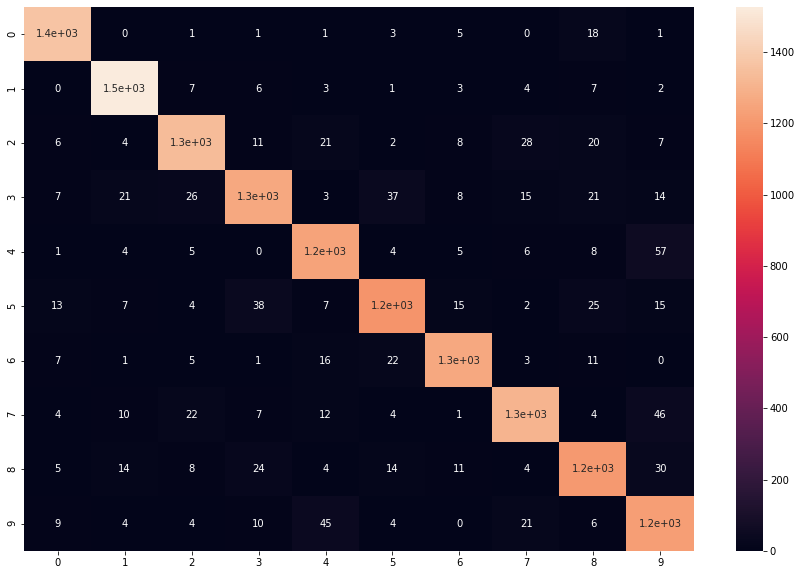

In [24]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(ytest, ypred)
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label')
plt.figure(figsize =(15,10))
sns.heatmap(cf_matrix, annot=True, xticklabels=list(np.unique(ypred)),yticklabels=list(np.unique(ypred)))

there are few missclassifications which are very much predicted, those of prections which the model got confused with 7 and 9 we can see in the confution matrix ans many more...
